## Imports

In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, datasets, utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

## MNIST Fashion Dataset
Baixando o dataset e dividindo o X_train em X_train e X_val

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']


(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


### One-hot encoding e reshaping para fazer o input na NN
Convertendo os labels para one-hot encoding e fazendo a adaptação das features (28x28) para 784.

In [4]:
y_train_one_hot = utils.to_categorical(y_train)
y_val_one_hot = utils.to_categorical(y_val)
y_test_one_hot = utils.to_categorical(y_test)

X_train_reshaped = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_val_reshaped = X_val.reshape(-1, X_val.shape[1] * X_val.shape[2])
X_test_reshaped = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])

### Mostrando uma imagem do dataset
Pegando a primeira imagem do dataset (sem o reshape) para verificação

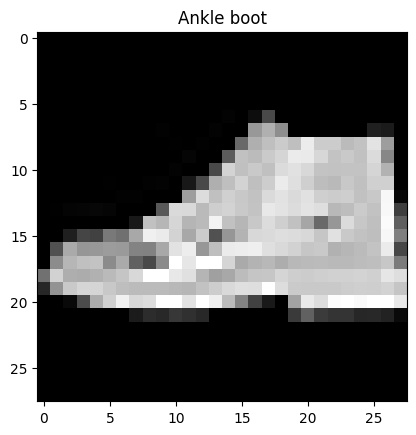

In [3]:
plt.title(class_names[y_train[0]])
plt.xlabel("")
plt.ylabel("")
plt.imshow(X_train[0], cmap='gray')
plt.show()

# Treinamento
Treinamento de três modelos de NN (Sequential) para comparação.

## Topologia 1

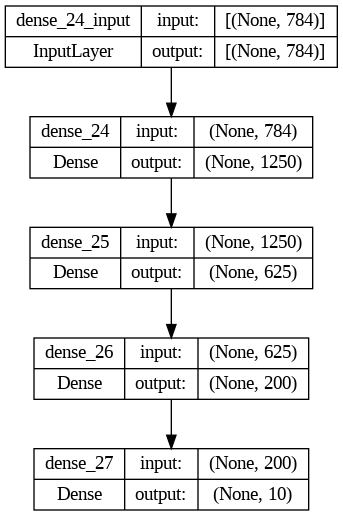

In [23]:
nn1 = Sequential()
nn1.add(Dense(1250, activation='relu', input_shape=(X_train_reshaped.shape[1],)))
nn1.add(Dense(625, activation='relu'))
nn1.add(Dense(200, activation='relu'))
nn1.add(Dense(10, activation='softmax'))

nn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

plot_model(nn1, show_shapes=True, show_layer_names=True, to_file='nn1.png')

In [24]:
nn1_history = nn1.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=64, validation_data=(X_val_reshaped, y_val_one_hot))

Epoch 1/10
750/750 [==============================] - 5s 4ms/step - loss: 3.0075 - categorical_accuracy: 0.7863 - val_loss: 0.4812 - val_categorical_accuracy: 0.8403
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4528 - categorical_accuracy: 0.8434 - val_loss: 0.4299 - val_categorical_accuracy: 0.8504
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4106 - categorical_accuracy: 0.8527 - val_loss: 0.4365 - val_categorical_accuracy: 0.8426
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3788 - categorical_accuracy: 0.8629 - val_loss: 0.4273 - val_categorical_accuracy: 0.8549
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3719 - categorical_accuracy: 0.8654 - val_loss: 0.3835 - val_categorical_accuracy: 0.8656
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3581 - categorical_accuracy: 0.8698 - val_loss: 0.3824 - val_categorical_accuracy: 0.8643
Epoc

## Topologia 2

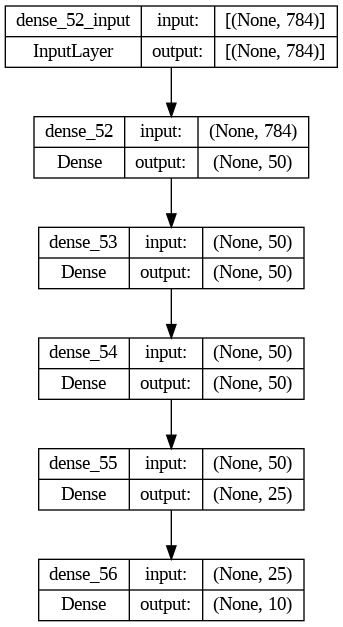

In [58]:
nn2 = Sequential()
nn2.add(Dense(50, activation='relu', input_shape=(X_train_reshaped.shape[1],)))
nn2.add(Dense(50, activation='relu'))
nn2.add(Dense(50, activation='relu'))
nn2.add(Dense(25, activation='relu'))
nn2.add(Dense(10, activation='softmax'))

nn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

plot_model(nn2, show_shapes=True, show_layer_names=True, to_file='nn2.png')

In [59]:
nn2_history = nn2.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=64, validation_data=(X_val_reshaped, y_val_one_hot))

Epoch 1/10
750/750 [==============================] - 5s 4ms/step - loss: 1.1952 - categorical_accuracy: 0.6910 - val_loss: 0.6237 - val_categorical_accuracy: 0.7748
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5716 - categorical_accuracy: 0.7867 - val_loss: 0.5317 - val_categorical_accuracy: 0.7971
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4981 - categorical_accuracy: 0.8153 - val_loss: 0.4773 - val_categorical_accuracy: 0.8253
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4539 - categorical_accuracy: 0.8331 - val_loss: 0.4507 - val_categorical_accuracy: 0.8388
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4198 - categorical_accuracy: 0.8471 - val_loss: 0.4141 - val_categorical_accuracy: 0.8534
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4016 - categorical_accuracy: 0.8548 - val_loss: 0.4087 - val_categorical_accuracy: 0.8558
Epoc

## Topologia 3

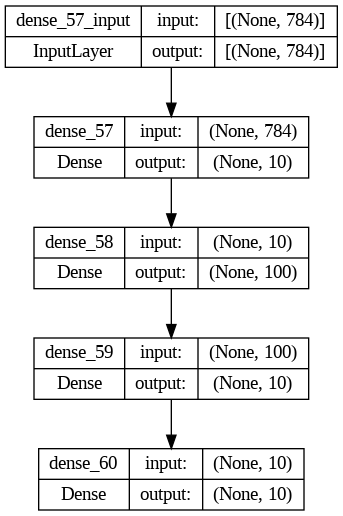

In [62]:
nn3 = Sequential()
nn3.add(Dense(10, activation='relu', input_shape=(X_train_reshaped.shape[1],)))
nn3.add(Dense(100, activation='relu'))
nn3.add(Dense(10, activation='sigmoid'))
nn3.add(Dense(10, activation='softmax'))

nn3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

plot_model(nn3, show_shapes=True, show_layer_names=True, to_file='nn3.png')

In [63]:
nn3_history = nn3.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=64, validation_data=(X_val_reshaped, y_val_one_hot))

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 1.5146 - categorical_accuracy: 0.5428 - val_loss: 1.2172 - val_categorical_accuracy: 0.6857
Epoch 2/10
750/750 [==============================] - 3s 5ms/step - loss: 1.1400 - categorical_accuracy: 0.6536 - val_loss: 0.9954 - val_categorical_accuracy: 0.7007
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.9550 - categorical_accuracy: 0.6847 - val_loss: 0.9015 - val_categorical_accuracy: 0.6943
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.8650 - categorical_accuracy: 0.7105 - val_loss: 0.9683 - val_categorical_accuracy: 0.6744
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.8256 - categorical_accuracy: 0.7157 - val_loss: 0.7732 - val_categorical_accuracy: 0.7290
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.7722 - categorical_accuracy: 0.7371 - val_loss: 0.7526 - val_categorical_accuracy: 0.7502
Epoc

# Treino e validação - Perda e Acurácia
Geração de gráficos contendo a topologia utilizada e as perdas e acurácia no treino e na validação de cada modelo.

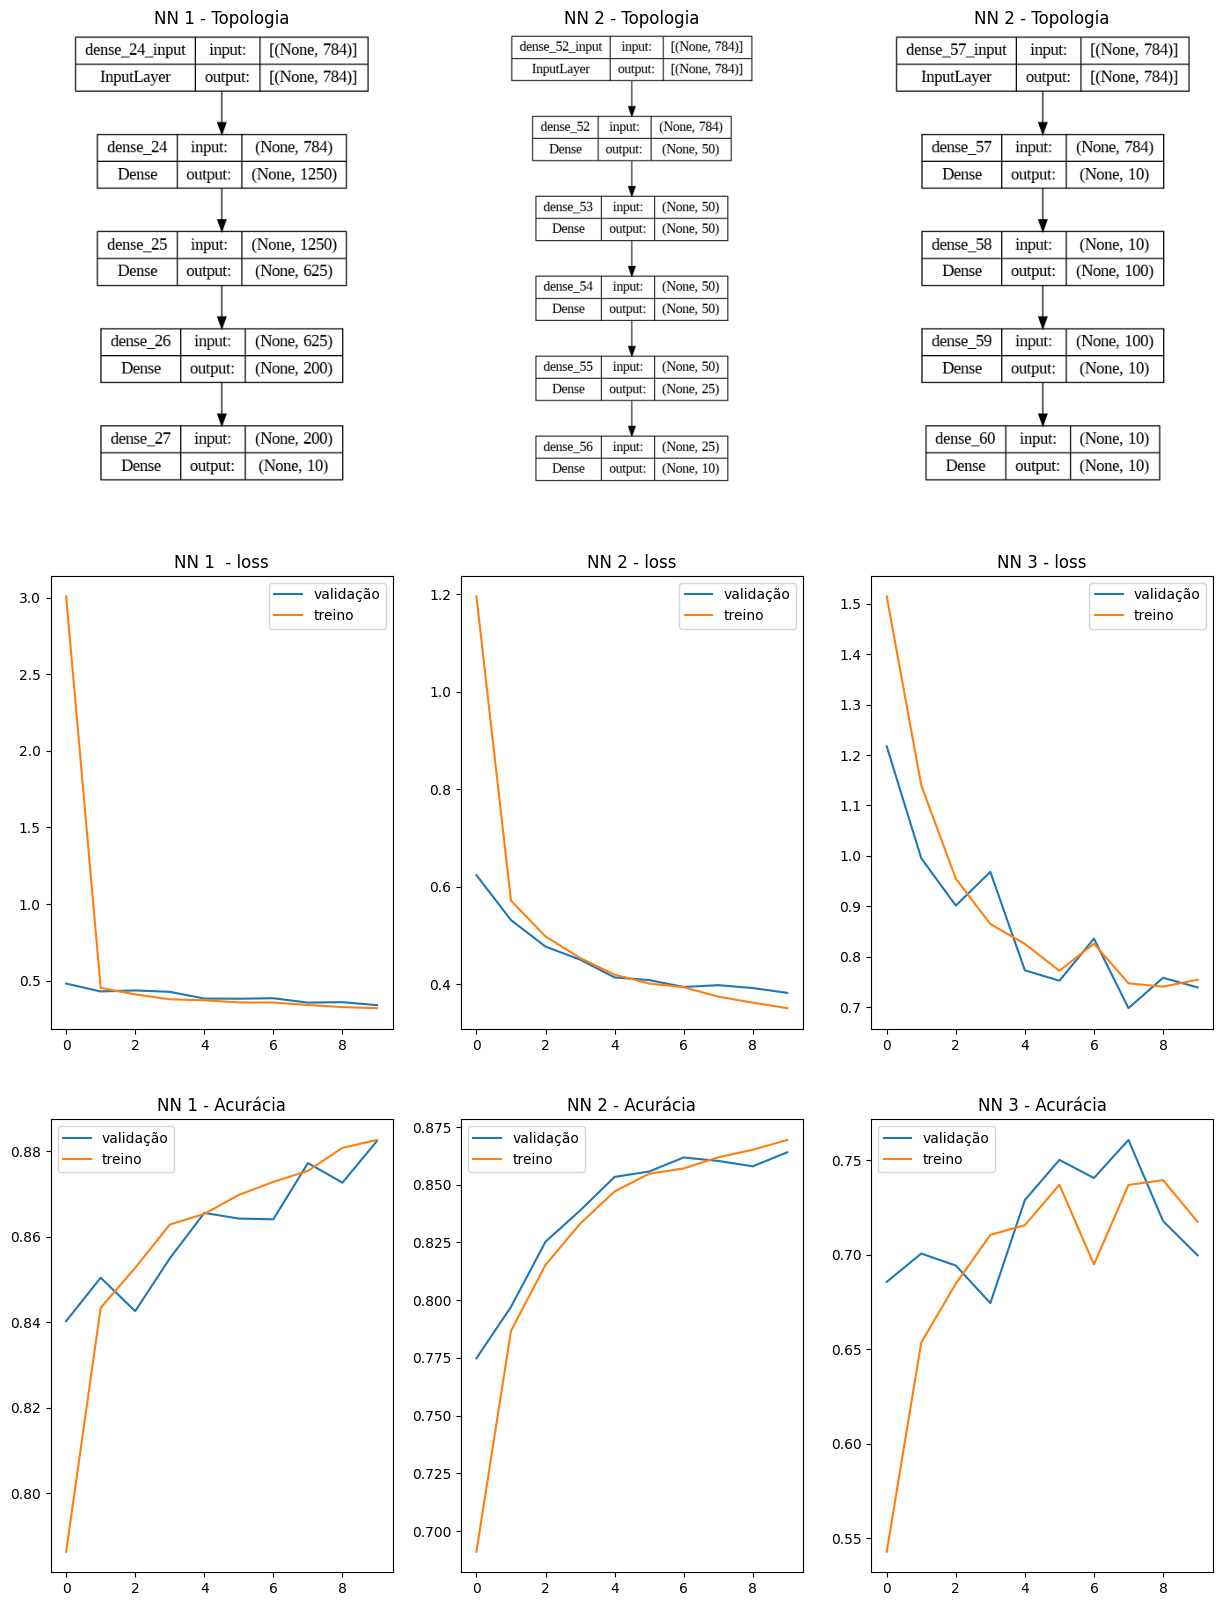

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(15, 20))

ax1[0].imshow(plt.imread('nn1.png'))
ax1[0].axis('off')
ax1[0].set_title('NN 1 - Topologia')

ax1[1].imshow(plt.imread('nn2.png'))
ax1[1].axis('off')
ax1[1].set_title('NN 2 - Topologia')

ax1[2].imshow(plt.imread('nn3.png'))
ax1[2].axis('off')
ax1[2].set_title('NN 2 - Topologia')

ax2[0].plot(nn1_history.history['val_loss'], label='validação')
ax2[0].plot(nn1_history.history['loss'], label='treino')
ax2[0].set_title('NN 1  - loss')
ax2[0].legend()

ax2[1].plot(nn2_history.history['val_loss'], label='validação')
ax2[1].plot(nn2_history.history['loss'], label='treino')
ax2[1].set_title('NN 2 - loss')
ax2[1].legend()

ax2[2].plot(nn3_history.history['val_loss'], label='validação')
ax2[2].plot(nn3_history.history['loss'], label='treino')
ax2[2].set_title('NN 3 - loss')
ax2[2].legend()

ax3[0].plot(nn1_history.history['val_categorical_accuracy'], label='validação')
ax3[0].plot(nn1_history.history['categorical_accuracy'], label='treino')
ax3[0].set_title('NN 1 - Acurácia')
ax3[0].legend()

ax3[1].plot(nn2_history.history['val_categorical_accuracy'], label='validação')
ax3[1].plot(nn2_history.history['categorical_accuracy'], label='treino')
ax3[1].set_title('NN 2 - Acurácia')
ax3[1].legend()

ax3[2].plot(nn3_history.history['val_categorical_accuracy'], label='validação')
ax3[2].plot(nn3_history.history['categorical_accuracy'], label='treino')
ax3[2].set_title('NN 3 - Acurácia')
ax3[2].legend()

# Dataset de teste - precision, recall e f1-score

## Gerando métricas

In [70]:
metrics = {
    'nn1': {},
    'nn2': {},
    'nn3': {}
}

y_pred_nn1 = nn1.predict(X_test_reshaped)
y_pred_nn1 = np.argmax(y_pred_nn1, axis=1)

precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred_nn1, average='macro')

metrics['nn1']['precision'] = precision
metrics['nn1']['recall'] = recall
metrics['nn1']['f1score'] = f1score

y_pred_nn2 = nn2.predict(X_test_reshaped)
y_pred_nn2 = np.argmax(y_pred_nn2, axis=1)

precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred_nn2, average='macro')

metrics['nn2']['precision'] = precision
metrics['nn2']['recall'] = recall
metrics['nn2']['f1score'] = f1score

y_pred_nn3 = nn3.predict(X_test_reshaped)
y_pred_nn3 = np.argmax(y_pred_nn3, axis=1)

precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred_nn3, average='macro')

metrics['nn3']['precision'] = precision
metrics['nn3']['recall'] = recall
metrics['nn3']['f1score'] = f1score

df = pd.DataFrame(metrics)
df = df.transpose()
df = df.reset_index()
df = df.rename(columns={'index': 'model'})
df = df[['model', 'precision', 'recall', 'f1score']]
df = df.sort_values(by='f1score', ascending=False)
df = df.reset_index(drop=True)
df

313/313 [==============================] - 1s 2ms/step


,model,precision,recall,f1score
0,nn1,0.871865,0.8677,0.868554
1,nn2,0.855353,0.8537,0.853131
2,nn3,0.704589,0.6896,0.668584


## Analisando métricas p/ cada modelo

model | precision |recall | f1score
--- | --- | --- | --- |
nn1 | 0.871865 | 0.8677 | 0.868554
nn2 | 0.855353 | 0.8537 | 0.853131
nn3 | 0.704589 | 0.6896 | 0.668584

---
Considerando a tabela acima:

1. **nn1:** Com uma precisão de 0.871865, o modelo tem uma alta porcentagem de resultados positivos verdadeiros entre todas as previsões positivas. A recall é 0.8677, o que significa que o modelo identificou corretamente quase 87% de todas as instâncias positivas reais. A pontuação F1 é 0.868554, indicando um forte equilíbrio entre precisão e recall.

2. **nn2:** A precisão aqui é 0.855353, que é ligeiramente menor que nn1, indicando uma taxa ligeiramente maior de falsos positivos. A recall é 0.8537, indicando que identificou corretamente cerca de 85% de todas as instâncias positivas reais, novamente um pouco menor que nn1. A pontuação F1 é 0.853131, indicando um modelo equilibrado, mas com precisão e recall ligeiramente menores em comparação com nn1.

3. **nn3:** Este modelo tem uma precisão de 0.704589, que é significativamente menor que os outros dois modelos, indicando uma taxa muito maior de falsos positivos. A recall é 0.6896, que novamente é significativamente menor, significando que o modelo identificou menos instâncias positivas reais. A pontuação F1 é 0.668584, indicando um equilíbrio pior entre precisão e recall em comparação com os outros dois modelos.

## Selecionando imagens que foram classificadas incorretamente p/ cada modelo

No gráfico abaixo, é possível verificar algumas imagens que foram incorretamente classificadas.
Cada linha representa um modelo e, no topo, contém a descrição true(a real classificação) e o pred(o que o modelo classificou).

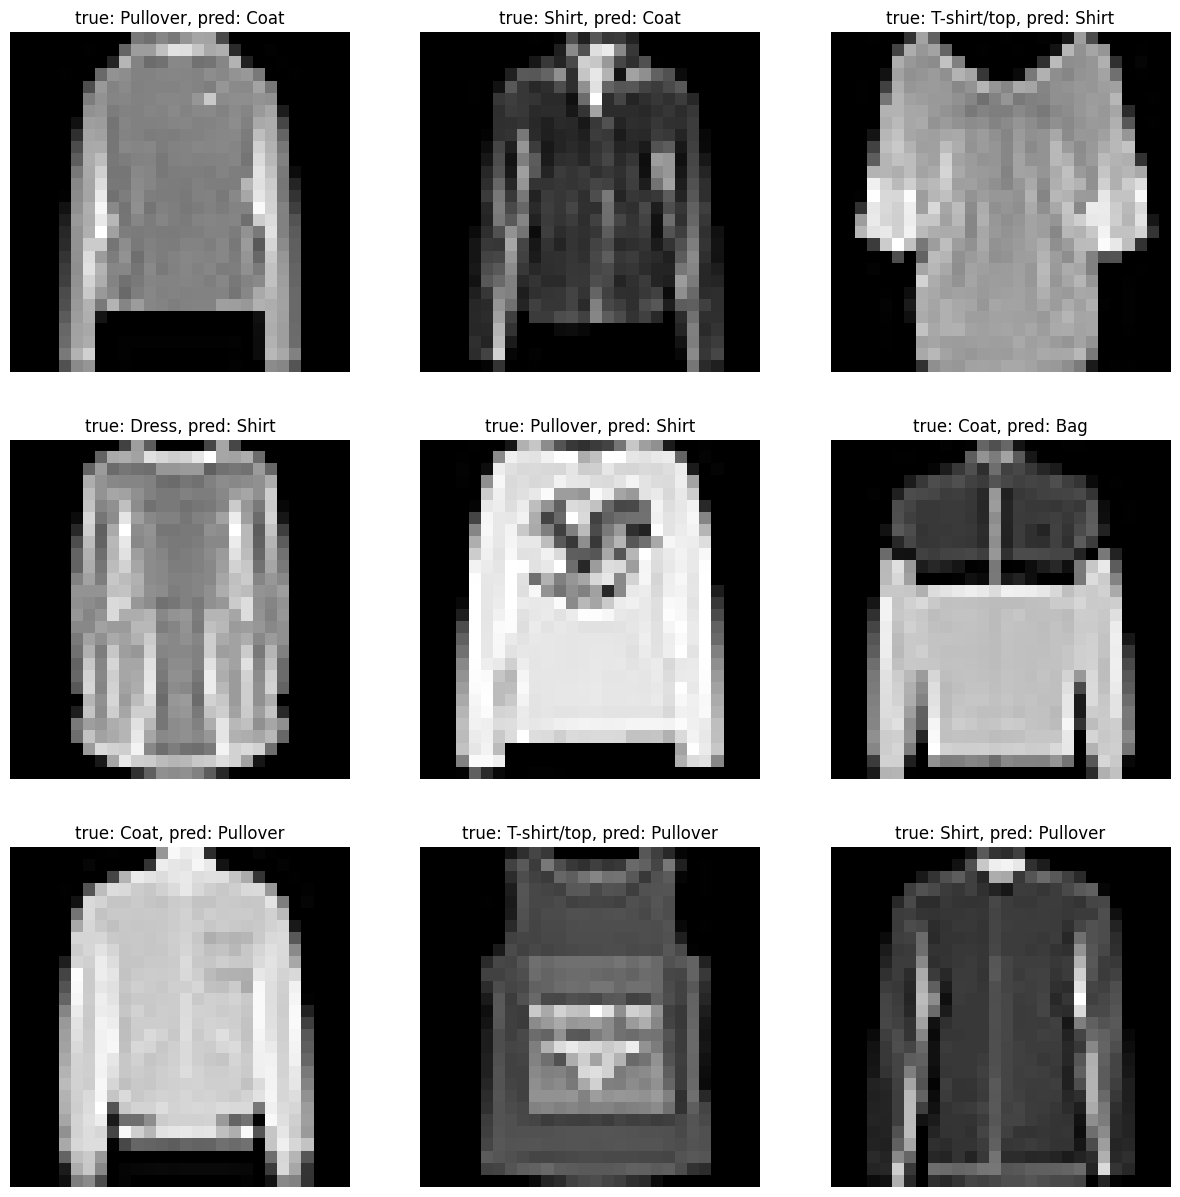

In [75]:
# selecting 3 images from each model (that were missclassified) and plotting them

missclassified_nn1 = []
missclassified_nn2 = []
missclassified_nn3 = []

for i in range(len(y_test)):
    if y_test[i] != y_pred_nn1[i]:
        missclassified_nn1.append(i)
    if y_test[i] != y_pred_nn2[i]:
        missclassified_nn2.append(i)
    if y_test[i] != y_pred_nn3[i]:
        missclassified_nn3.append(i)

missclassified_nn1 = np.random.choice(missclassified_nn1, 3)
missclassified_nn2 = np.random.choice(missclassified_nn2, 3)
missclassified_nn3 = np.random.choice(missclassified_nn3, 3)

fig, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    ax1[i].imshow(X_test[missclassified_nn1[i]], cmap='gray')
    ax1[i].set_title('true: ' + class_names[y_test[missclassified_nn1[i]]] + ', pred: ' + class_names[y_pred_nn1[missclassified_nn1[i]]])
    ax1[i].axis('off')

for i in range(3):
    ax2[i].imshow(X_test[missclassified_nn2[i]], cmap='gray')
    ax2[i].set_title('true: ' + class_names[y_test[missclassified_nn2[i]]] + ', pred: ' + class_names[y_pred_nn2[missclassified_nn2[i]]])
    ax2[i].axis('off')

for i in range(3):
    ax3[i].imshow(X_test[missclassified_nn3[i]], cmap='gray')
    ax3[i].set_title('true: ' + class_names[y_test[missclassified_nn3[i]]] + ', pred: ' + class_names[y_pred_nn3[missclassified_nn3[i]]])
    ax3[i].axis('off')

plt.show()